<a href="https://colab.research.google.com/github/BwdYj3108/Nidhi/blob/main/word2vecpretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade gensim -q
!pip install matplotlib -q

In [ ]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string

In [ ]:
gensim.__version__

'4.3.1'

In [ ]:
np.random.seed(42)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

#Use Pretrained Word Vectors

In [ ]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
wv = api.load('glove-twitter-200')

[==================================================] 100.0% 758.5/758.5MB downloaded


In [ ]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [ ]:
wv['sarcasm']

array([ 5.5789e-01,  1.2894e-01,  5.8807e-02, -1.7184e-01, -2.1062e-01,
        6.2724e-01,  3.8536e-01, -8.4433e-02, -1.1365e+00,  2.3821e-02,
        5.3795e-02, -6.7236e-01, -3.0422e-01,  1.1528e+00, -2.6915e-01,
        3.8259e-01, -3.9516e-01,  1.7018e-01, -1.1841e-01, -1.2170e+00,
       -2.3860e-01,  1.9965e-01,  3.4177e-01, -5.6872e-01,  3.4706e-01,
        1.4325e+00, -1.4076e-01, -5.2220e-01, -1.0320e-01, -2.6111e-01,
        3.5777e-01,  3.6756e-02, -4.0606e-01, -8.5759e-01,  2.4264e-01,
        1.2333e-02,  3.2333e-01, -5.5376e-02,  9.6043e-02,  2.3453e-01,
        1.2113e+00, -1.3714e-03,  4.8227e-01, -3.6788e-02,  6.1119e-01,
        4.1280e-01,  1.8004e-01,  1.0982e+00, -3.9601e-02, -5.0017e-01,
        6.3369e-01,  3.3001e-01,  8.4009e-03, -9.1504e-01,  8.9476e-01,
       -3.5948e-01, -6.0683e-01, -1.2135e-01, -7.2819e-01,  1.7653e-01,
       -5.3398e-01,  2.9630e-01, -1.1180e+00,  2.0071e-01,  8.2873e-02,
       -2.5766e-01, -7.1431e-01,  1.7063e-01, -1.0573e+00,  3.07

In [ ]:
len(wv['sarcasm'])

200

In [ ]:
wv.similarity("sarcasm", "figurative")

0.25014803

In [ ]:
wv.similarity("sarcasm", "regular")

0.22642589

#Semantic regularities captured in word embeddings

In [ ]:
wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

[('queen', 0.6820898056030273),
 ('prince', 0.5875527262687683),
 ('princess', 0.5620489120483398)]

In [ ]:
wv.most_similar(positive=['woman', 'king'], topn=3)

[('girl', 0.7306562662124634),
 ('queen', 0.7207667231559753),
 ('that', 0.7187842130661011)]

In [ ]:
words = ['irony','figurative','sarcasm','peace','regular']

In [ ]:
sample_vectors = np.array([wv[word] for word in words])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

array([[ 1.2267718, -1.070624 ],
       [ 1.1867611,  4.2864037],
       [ 4.0597553, -2.337758 ],
       [-3.9033687, -2.5953434],
       [-2.56992  ,  1.7173201]], dtype=float32)

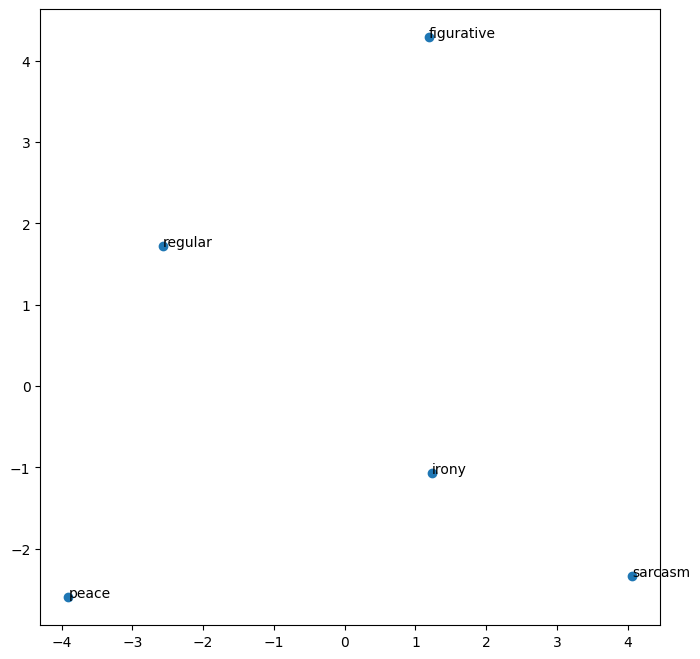

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

#Importing The Dataset

In [ ]:
data = pd.read_csv("tweet.csv")
data

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative
...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm
81404,I never knew..I better put this out to the Uni...,sarcasm
81405,hey just wanted to say thanks @ puberty for le...,sarcasm
81406,I'm sure coverage like the Fox News Special “T...,sarcasm


In [ ]:
data.head

<bound method NDFrame.head of                                                   tweets       class
0      Be aware  dirty step to get money  #staylight ...  figurative
1      #sarcasm for #people who don't understand #diy...  figurative
2      @IminworkJeremy @medsingle #DailyMail readers ...  figurative
3      @wilw Why do I get the feeling you like games?...  figurative
4      -@TeacherArthurG @rweingarten You probably jus...  figurative
...                                                  ...         ...
81403  Photo: Image via We Heart It http://t.co/ky8Nf...     sarcasm
81404  I never knew..I better put this out to the Uni...     sarcasm
81405  hey just wanted to say thanks @ puberty for le...     sarcasm
81406  I'm sure coverage like the Fox News Special “T...     sarcasm
81407  @skeyno16 at u13?! I won't believe it until I ...     sarcasm

[81408 rows x 2 columns]>

In [ ]:
data.shape

(81408, 2)

In [ ]:
# checking duplicate rows
data.duplicated().sum()

49

In [ ]:
# droping duplicate rows
data=data.drop_duplicates()

In [ ]:
import re

In [ ]:
def textCleaning(tweets):
    op = re.sub("https://[a-zA-Z0-9/\.]+"," ",tweets)
    op = re.sub("[^a-zA-Z0-9]+"," ",op)
    op = re.sub(r"\b\d+(th)?\b"," ",op)
    op = re.sub(r"\b[a-zA-Z0-90]\b"," ",op)
    op = re.sub("\s+"," ",op)
#     op = "".join([w for w in op if w not in STOPWORDS])
    return op
textCleaning(data.tweets[0])

'Be aware dirty step to get money staylight staywhite sarcastic moralneeded '

In [ ]:
data.tweets = data.tweets.map(textCleaning)

<ipython-input-86-bed156387877>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.tweets = data.tweets.map(textCleaning)


In [ ]:
# Removing user name
import re                #regex package(regular expression)

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)       #it finds specific words from text
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt

# remove user handles
data['tweets'] = data['tweets'].apply(lambda row:remove_pattern(row, "@[\w]*")) #removing words related with '@'' replaced with 'space'


# first five observations
data.head()

<ipython-input-87-6d88db46f32a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweets'] = data['tweets'].apply(lambda row:remove_pattern(row, "@[\w]*")) #removing words related with '@'' replaced with 'space'


,tweets,class
0,Be aware dirty step to get money staylight sta...,figurative
1,sarcasm for people who don understand diy art...,figurative
2,IminworkJeremy medsingle DailyMail readers be...,figurative
3,wilw Why do get the feeling you like games sa...,figurative
4,TeacherArthurG rweingarten You probably just ...,figurative


In [ ]:
# Converting into Lower case
data['tweets']=data['tweets'].str.lower()
data.head()

<ipython-input-88-c491a8f90374>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweets']=data['tweets'].str.lower()


,tweets,class
0,be aware dirty step to get money staylight sta...,figurative
1,sarcasm for people who don understand diy art...,figurative
2,iminworkjeremy medsingle dailymail readers be...,figurative
3,wilw why do get the feeling you like games sa...,figurative
4,teacherarthurg rweingarten you probably just ...,figurative


Removing numerical data from Tweets

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['tweets'] = data['tweets'].apply(cleaning_numbers)
data['tweets'].tail()

<ipython-input-89-baf791dfc1c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweets'] = data['tweets'].apply(cleaning_numbers)


81403    photo image via we heart it http co kynfzoi ch...
81404     never knew better put this out to the univers...
81405    hey just wanted to say thanks puberty for lett...
81406     sure coverage like the fox news special the h...
81407      skeyno at u won believe it until see it sarcasm
Name: tweets, dtype: object

Removing words which are not part of English Vocabulary

In [ ]:
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

In [ ]:
def is_meaningful(word):
    # Exclude stopwords
    if word.lower() in remove_set:
        return False
    # Exclude punctuation marks
    if not word.isalpha():
        return False
    # Exclude words not found in WordNet
    if not wordnet.synsets(word):
        return False
    return True

In [ ]:
def remove_meaninglesswords(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if is_meaningful(word)]
    clean_text = ' '.join(filtered_words)
    return filtered_words

In [ ]:
data.head()

,tweets,class
0,be aware dirty step to get money staylight sta...,figurative
1,sarcasm for people who don understand diy art...,figurative
2,iminworkjeremy medsingle dailymail readers be...,figurative
3,wilw why do get the feeling you like games sa...,figurative
4,teacherarthurg rweingarten you probably just ...,figurative


Taking average of the words of each sentence to get final representation of each sentence same as that of word length of 200 dimension

In [ ]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [ ]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)



    # print(doc)
    # print(type(doc))

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # print(mytokens)

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [ ]:
sent_vec("I am happy")

array([ 2.56112503e-01, -6.91402513e-02,  8.69197547e-02, -8.34437273e-03,
       -6.34400267e-03,  7.22818794e-02, -4.73435504e-01, -5.58649972e-02,
       -1.89825128e-01,  4.06767540e-02, -6.42848769e-02, -3.32323002e-01,
        8.16562492e-02,  4.97746263e-02,  1.57576245e-01, -1.44525017e-02,
       -2.66296251e-01, -6.06195061e-02, -3.21282491e-01,  3.61954998e-01,
       -2.51182878e-01, -2.72545122e-01,  3.69678756e-01,  2.14506254e-01,
        3.01211755e-01, -1.69056499e+00, -1.22658496e-01, -1.33376413e-01,
        3.50555006e-01,  3.79418764e-01, -1.15433122e-01, -1.17419701e-01,
       -1.13211999e-01,  6.13570723e-02,  2.12611722e-01,  7.69301169e-02,
       -2.79238371e-01, -1.43211126e-01, -4.96171232e-01,  3.60221252e-01,
       -9.24269985e-01,  1.69066499e-01,  2.21723745e-01,  4.02787235e-03,
        1.42155756e-01, -8.19018765e-02, -7.26452507e-02, -1.57522500e-01,
        4.31162510e-02, -7.11207160e-02,  1.66229992e-02,  3.79724940e-03,
        2.02909978e-02, -

In [ ]:
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'at', 'beside', 'twenty', 'from', 'been', 'ours', 'sometimes', 'sixty', 'in', 'more', 'call', 'there', 'my', 'hereby', 'have', 'over', 'thence', 'whole', 'few', 'becomes', 'seeming', 'we', 'because', 'same', 'on', 'further', 'four', 'n’t', 'had', 'us', 'thereby', 'nevertheless', 'anywhere', 'part', 'neither', "'d", 'both', 'seem', 'ca', 'whereby', 'often', 'with', 'being', 'alone', 'what', '’s', 'next', 'done', 'since', '‘ll', 'those', 'everything', 'latterly', 'only', 'show', 'this', 'except', 'besides', 'wherever', 'serious', 'name', "'re", 'itself', 'would', 'along', 'too', 'fifteen', 'seems', 'hereafter', 'through', 'our', 'meanwhile', 'n‘t', 'becoming', 'when', 'perhaps', 'so', 'also', 'upon', '’m', 'again', 'nine', 'than', 'several', 'twelve', '‘m', 'per', 'forty', 'beforehand', 'down', 'rather', 'give', 'about', 'to', 'other', 'others', 'full', 'that', 'eleven', 'eight', 'an', '‘d', 'among', 'nowhere', 'once', 'ten', 'therefore', 'will', 'just', 'has', 'namely', 'side', 'wherea

In [ ]:
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
data['tokens'] = data['tweets'].apply(spacy_tokenizer)

<ipython-input-99-87a49ef3cc83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokens'] = data['tweets'].apply(spacy_tokenizer)


In [ ]:
data.head()

,tweets,class,tokens
0,be aware dirty step to get money staylight sta...,figurative,"[aware, dirty, step, money, staylight, staywhi..."
1,sarcasm for people who don understand diy art...,figurative,"[sarcasm, people, don, understand, diy, artatt..."
2,iminworkjeremy medsingle dailymail readers be...,figurative,"[iminworkjeremy, medsingle, dailymail, reader,..."
3,wilw why do get the feeling you like games sa...,figurative,"[wilw, feeling, like, game, sarcasm]"
4,teacherarthurg rweingarten you probably just ...,figurative,"[teacherarthurg, rweingarten, probably, miss, ..."


In [ ]:
data['vec'] = data['tokens'].apply(sent_vec)

<ipython-input-101-697b65f9d5c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['vec'] = data['tokens'].apply(sent_vec)


In [ ]:
data.head()

,tweets,class,tokens,vec
0,be aware dirty step to get money staylight sta...,figurative,"[aware, dirty, step, money, staylight, staywhi...","[0.035690002143383026, -0.02036833018064499, -..."
1,sarcasm for people who don understand diy art...,figurative,"[sarcasm, people, don, understand, diy, artatt...","[0.04091092028344671, 0.08042833540174696, -0...."
2,iminworkjeremy medsingle dailymail readers be...,figurative,"[iminworkjeremy, medsingle, dailymail, reader,...","[0.19440557233368358, 0.11863167583942413, -0...."
3,wilw why do get the feeling you like games sa...,figurative,"[wilw, feeling, like, game, sarcasm]","[0.31178060043603184, 0.14631346073001622, 0.0..."
4,teacherarthurg rweingarten you probably just ...,figurative,"[teacherarthurg, rweingarten, probably, miss, ...","[0.165470680128783, 0.41472579091787337, -0.11..."


In [ ]:
data['class'] = data['class'].replace({"figurative":0,"irony":1,"regular":2,"sarcasm":3})

<ipython-input-103-c4859a6af159>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'] = data['class'].replace({"figurative":0,"irony":1,"regular":2,"sarcasm":3})


In [ ]:
data.head()

,tweets,class,tokens,vec
0,be aware dirty step to get money staylight sta...,0,"[aware, dirty, step, money, staylight, staywhi...","[0.035690002143383026, -0.02036833018064499, -..."
1,sarcasm for people who don understand diy art...,0,"[sarcasm, people, don, understand, diy, artatt...","[0.04091092028344671, 0.08042833540174696, -0...."
2,iminworkjeremy medsingle dailymail readers be...,0,"[iminworkjeremy, medsingle, dailymail, reader,...","[0.19440557233368358, 0.11863167583942413, -0...."
3,wilw why do get the feeling you like games sa...,0,"[wilw, feeling, like, game, sarcasm]","[0.31178060043603184, 0.14631346073001622, 0.0..."
4,teacherarthurg rweingarten you probably just ...,0,"[teacherarthurg, rweingarten, probably, miss, ...","[0.165470680128783, 0.41472579091787337, -0.11..."


In [ ]:
y = data["class"]
y

0        0
1        0
2        0
3        0
4        0
        ..
81403    3
81404    3
81405    3
81406    3
81407    3
Name: class, Length: 81359, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [ ]:
y

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
X=data['vec'].to_list()
y=data['class'].to_list()

In [ ]:
X[0]

array([ 3.56900021e-02, -2.03683302e-02, -1.02734169e-01,  9.21209844e-02,
       -3.98151670e-02,  1.72514990e-01,  7.39490002e-01, -3.31711333e-01,
       -2.98850089e-02,  1.38390831e-01, -2.17379998e-01,  2.32681663e-02,
       -5.57193339e-01,  2.61166940e-03, -4.18886611e-02,  1.94592328e-01,
       -9.97033417e-02,  2.36396655e-01,  1.52535661e-01,  1.91167832e-02,
       -2.72611702e-02, -1.64361661e-02,  1.22401838e-01, -2.10628328e-01,
       -5.75828360e-02,  1.03324499e+00,  9.11258360e-02,  5.66910702e-02,
       -2.09197339e-01, -1.32858501e-01,  3.50010235e-01, -1.00910867e-01,
       -9.96989968e-02,  3.12215065e-02, -2.39644665e-01,  1.42703171e-01,
        1.50815000e-01,  2.13364330e-01, -1.71031691e-02, -9.12181654e-02,
        3.48550664e-01,  1.60229838e-01,  2.99925823e-01,  1.18549501e-01,
        1.02994998e-01,  8.94883325e-02,  2.67540004e-01,  2.79306668e-01,
       -6.90196548e-02,  3.29824662e-01,  1.49668671e-01,  1.20463831e-01,
       -1.79369334e-01, -

In [ ]:
y[0]

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81359 entries, 0 to 81407
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81359 non-null  object
 1   class   81359 non-null  int64 
 2   tokens  81359 non-null  object
 3   vec     81359 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.1+ MB


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [ ]:
classifier.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn import metrics
predicted = classifier.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))

Logistic Regression Accuracy: 0.6979473942969519


In [ ]:
import seaborn as sns

In [ ]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['figurative', 'irony', 'regular', 'sarcasm']
    cm_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=0)[:, np.newaxis] * 100
    print(pd.DataFrame(cf_matrix))

    sns.heatmap(cf_matrix, annot=True,cmap = 'Blues',fmt = '.1f',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report

              precision    recall  f1-score   support

           0       0.33      0.14      0.19      4174
           1       0.66      0.88      0.76      4109
           2       0.96      0.98      0.97      3873
           3       0.66      0.82      0.73      4116

    accuracy                           0.70     16272
   macro avg       0.65      0.71      0.66     16272
weighted avg       0.65      0.70      0.66     16272

     0     1     2     3
0  573  1809    50  1742
1  432  3620    56     1
2   36    43  3788     6
3  689     0    32  3395


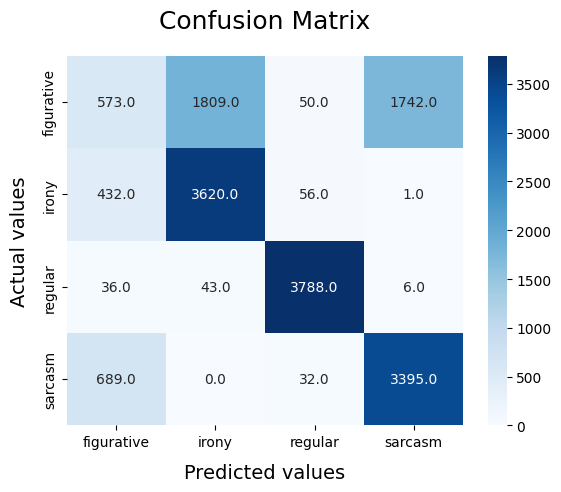

In [ ]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.28      0.17      0.21      4174
           1       0.61      0.71      0.66      4109
           2       0.71      0.77      0.74      3873
           3       0.66      0.74      0.70      4116

    accuracy                           0.60     16272
   macro avg       0.56      0.60      0.58     16272
weighted avg       0.56      0.60      0.57     16272

     0     1     2     3
0  714  1490   397  1573
1  564  2935   604     6
2  461   403  2993    16
3  805    19   233  3059


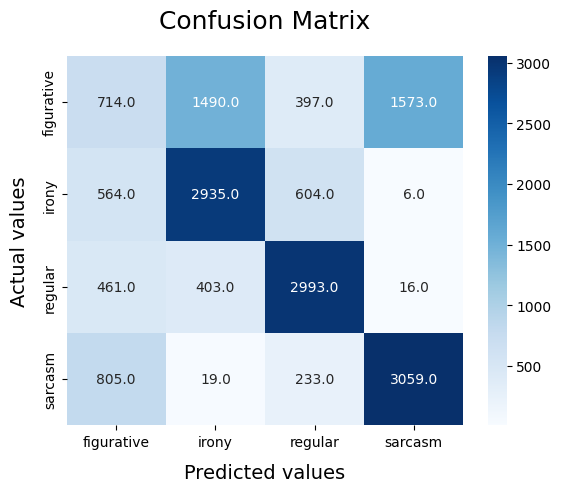

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)


              precision    recall  f1-score   support

           0       0.32      0.02      0.03      4174
           1       0.66      0.97      0.79      4109
           2       0.95      0.98      0.97      3873
           3       0.66      0.96      0.78      4116

    accuracy                           0.73     16272
   macro avg       0.65      0.73      0.64     16272
weighted avg       0.64      0.73      0.63     16272

    0     1     2     3
0  69  1995    68  2042
1  43  3985    76     5
2  10    46  3806    11
3  96     5    48  3967


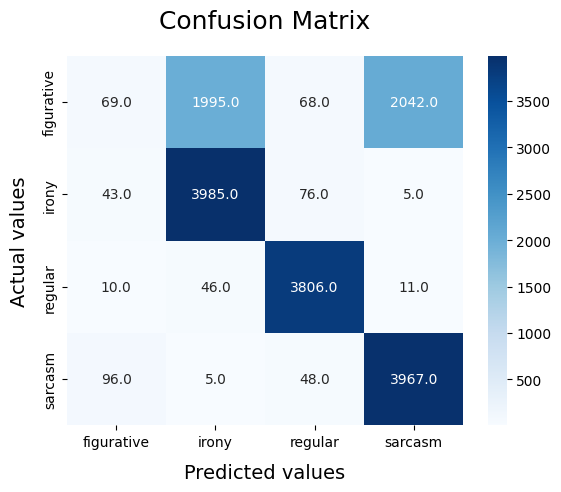

In [ ]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

              precision    recall  f1-score   support

           0       0.04      0.02      0.03      4174
           1       0.53      0.62      0.57      4109
           2       0.93      0.93      0.93      3873
           3       0.59      0.73      0.65      4116

    accuracy                           0.57     16272
   macro avg       0.52      0.58      0.54     16272
weighted avg       0.51      0.57      0.54     16272

      0     1     2     3
0    94  2011    62  2007
1  1377  2543   163    26
2    34   187  3615    37
3   991    74    61  2990


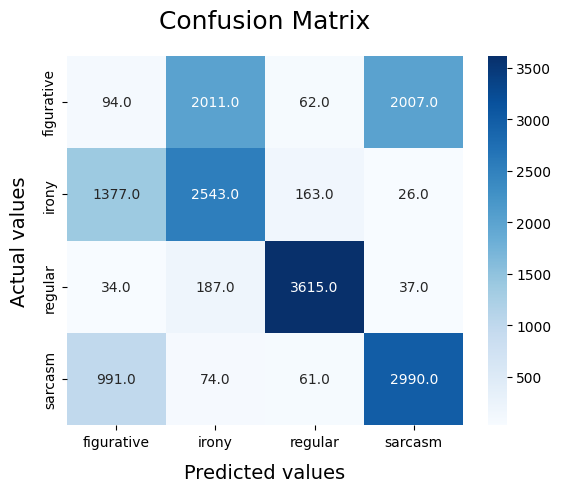

In [ ]:
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train, y_train)
model_Evaluate(rfmodel)
y_pred2 = rfmodel.predict(X_test)